In [3]:
f = read.csv("fit_data_o.csv");

In [4]:
vars = cbind(f$Mod, f$Udl, f$time, f$Pop1, f$Pop10, f$Anime,f$LoreFriendly,f$NotLoreFriendly,f$NotSafeForWork,f$Nudity,f$SexySkimpy,f$Unrealistic,f$ArmorShields,f$Books,f$Clothing,f$ClothingFemale,f$ClothingMale,f$Creatures,f$CreaturesRideable,f$ItemsApparatus,f$ItemsClutter,f$ItemsFurniture,f$ItemsIngredients,f$ItemsLeveled,f$LocationsBuildings,f$LocationsCaverns,f$LocationsDungeons,f$LocationsPlayerOwned,f$LocationsWorldMap,f$MagicEnchantments,f$MagicPotions,f$MagicSpells,f$NPCTrainers,f$NPCVendors,f$NPCs,f$PlantsFoliage,f$Weapons,f$AnimationModified,f$AnimationNew,f$AudioSoundFX,f$AudioVoices,f$Birthsigns,f$Bodymodels,f$Classescomponent,f$EnvironmentOther,f$EnvironmentSky,f$EnvironmentWater,f$EnvironmentWeather,f$Facemodels,f$GuildsFactions,f$Hair,f$LeveledLists,f$Lighting,f$NewLands,f$Newmodels,f$Newtextures,f$Quests,f$RacesModified,f$ScriptedEvents,f$Video,f$Chargen,f$CompanionFriendly,f$Companions,f$Compilation,f$ENBPreset,f$Forfemalecharacters,f$Formalecharacters,f$GameplayEffectsChanges,f$Official,f$PerformanceOptimization,f$Poses,f$Relatedtohorses,f$RelatedtoMoviesTVOtherGames,f$Relatedtovampires,f$Replacer,f$Cheating,f$Fairandbalanced,f$Unbalanced,f$BABBodybase,f$ECHGECBodybase,f$RobertFemaleBodybase,f$RobertMaleBodybase,f$TFFUFFBodybase);
colf = c("Mod", "Udl",'time' ,"Pop1", "Pop10","Anime","LoreFriendly","NotLoreFriendly","NotSafeForWork","Nudity","SexySkimpy","Unrealistic","ArmorShields","Books","Clothing","ClothingFemale","ClothingMale","Creatures","CreaturesRideable","ItemsApparatus","ItemsClutter","ItemsFurniture","ItemsIngredients","ItemsLeveled","LocationsBuildings","LocationsCaverns","LocationsDungeons","LocationsPlayerOwned","LocationsWorldMap","MagicEnchantments","MagicPotions","MagicSpells","NPCTrainers","NPCVendors","NPCs","PlantsFoliage","Weapons","AnimationModified","AnimationNew","AudioSoundFX","AudioVoices","Birthsigns","Bodymodels","Classescomponent","EnvironmentOther","EnvironmentSky","EnvironmentWater","EnvironmentWeather","Facemodels","GuildsFactions","Hair","LeveledLists","Lighting","NewLands","Newmodels","Newtextures","Quests","RacesModified","ScriptedEvents","Video","Chargen","CompanionFriendly","Companions","Compilation","ENBPreset","Forfemalecharacters","Formalecharacters","GameplayEffectsChanges","Official","PerformanceOptimization","Poses","Relatedtohorses","RelatedtoMoviesTVOtherGames","Relatedtovampires","Replacer","Cheating","Fairandbalanced","Unbalanced","BABBodybase","ECHGECBodybase","RobertFemaleBodybase","RobertMaleBodybase","TFFUFFBodybase");

dimnames(vars)[[2]] <- colf
data <- data.frame(vars);

dim(vars)

[1] 19876    83

In [5]:
summary(data);

      Mod             Udl              time           Pop1        
 Min.   :  937   Min.   :     0   Min.   : 176   Min.   :0.00000  
 1st Qu.:19530   1st Qu.:   147   1st Qu.:1815   1st Qu.:0.00000  
 Median :29088   Median :   418   Median :2283   Median :0.00000  
 Mean   :28560   Mean   :  2707   Mean   :2231   Mean   :0.01001  
 3rd Qu.:38057   3rd Qu.:  1330   3rd Qu.:2772   3rd Qu.:0.00000  
 Max.   :46476   Max.   :787038   Max.   :3988   Max.   :1.00000  
     Pop10         Anime           LoreFriendly     NotLoreFriendly  
 Min.   :0.0   Min.   :0.000000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.0   1st Qu.:0.000000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.0   Median :0.000000   Median :0.00000   Median :0.00000  
 Mean   :0.1   Mean   :0.004276   Mean   :0.08206   Mean   :0.01243  
 3rd Qu.:0.0   3rd Qu.:0.000000   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :1.0   Max.   :1.000000   Max.   :1.00000   Max.   :1.00000  
 NotSafeForWork        Nudity          Se

In [6]:
# Define a function
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max) > level;
  res[sel,sel];
}
hiCor(data,.6)

,Mod,time,Newmodels,Newtextures
Mod,1.000000000,-0.999878079,-0.004638365,-0.015014649
time,-0.999878079,1.000000000,0.004611737,0.014987003
Newmodels,-0.004638365,0.004611737,1.000000000,0.618721944
Newtextures,-0.01501465,0.01498700,0.61872194,1.00000000


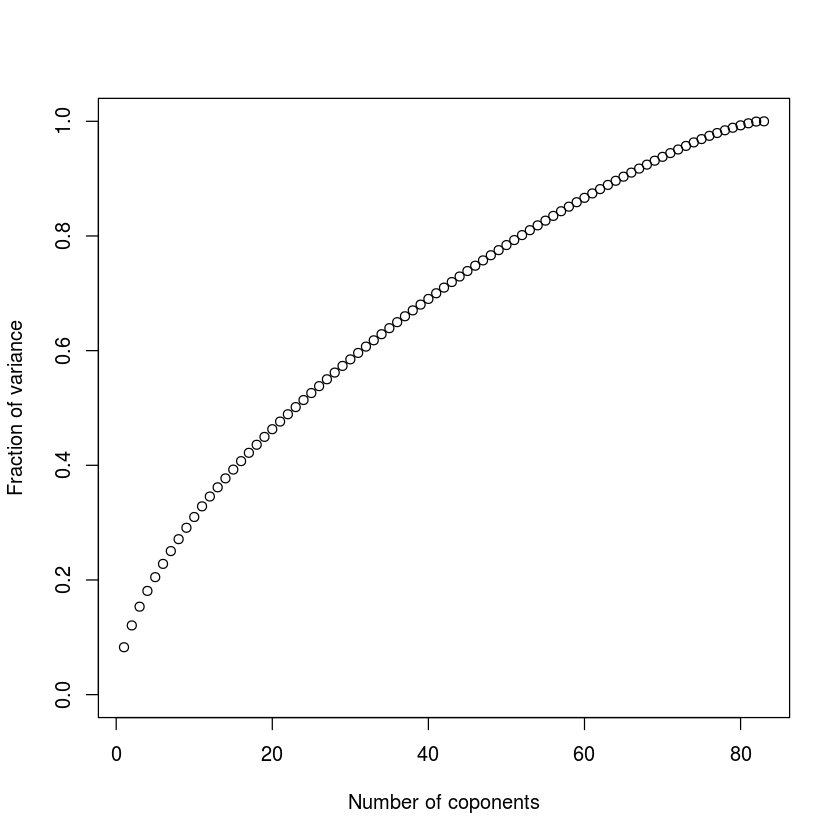

In [7]:
plot(1:83,cumsum(prcomp(vars, retx=F,scale=T)$sdev^2)/sum(prcomp(vars, retx=F,scale=T)$sdev^2),ylim=c(0,1),xlab="Number of coponents",ylab="Fraction of variance");

In [8]:
res<-prcomp(vars, retx=F,scale=T)$rotation[,1:3];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
for (i in 1:3)
  print(t(res[resAbs[,i]>.1,i,drop=FALSE]));

    LoreFriendly ArmorShields      Books   Clothing ClothingMale Creatures
PC1    -0.133495   -0.1651524 -0.1868999 -0.1375174   -0.1141416 -0.146635
    ItemsApparatus ItemsClutter ItemsFurniture ItemsIngredients ItemsLeveled
PC1     -0.1598242   -0.1679938     -0.1512715       -0.1884014   -0.1446868
    LocationsBuildings LocationsCaverns LocationsDungeons LocationsPlayerOwned
PC1         -0.1789651       -0.1825262        -0.1987479           -0.1252572
    LocationsWorldMap MagicEnchantments MagicPotions MagicSpells NPCTrainers
PC1        -0.1768228        -0.1380086   -0.1678409  -0.1246208  -0.1676843
    NPCVendors       NPCs PlantsFoliage    Weapons AudioSoundFX AudioVoices
PC1 -0.1829417 -0.1886938     -0.138786 -0.1490759   -0.1188765  -0.1238573
    EnvironmentWeather GuildsFactions   NewLands  Newmodels Newtextures
PC1         -0.1025767     -0.1487636 -0.1558432 -0.1402949  -0.1402321
        Quests ScriptedEvents Forfemalecharacters Formalecharacters
PC1 -0.1821176      

In [9]:
modl <- glm(Pop1 ~  time+LoreFriendly+Nudity+ArmorShields+AnimationModified+AnimationNew+EnvironmentOther+Facemodels+Hair+Newmodels+Newtextures+Video+Compilation+GameplayEffectsChanges+PerformanceOptimization+Replacer+Anime+NotLoreFriendly+NotSafeForWork+SexySkimpy+Books+Clothing+LocationsBuildings+LocationsWorldMap+NPCs+PlantsFoliage+Weapons+AudioSoundFX+EnvironmentWeather+GuildsFactions+Quests+Companions+Forfemalecharacters+Formalecharacters+Poses+Cheating+Unbalanced+ECHGECBodybase,family=binomial,data=data);
summary(modl);

Warning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurred


Call:
glm(formula = Pop1 ~ time + LoreFriendly + Nudity + ArmorShields + 
    AnimationModified + AnimationNew + EnvironmentOther + Facemodels + 
    Hair + Newmodels + Newtextures + Video + Compilation + GameplayEffectsChanges + 
    PerformanceOptimization + Replacer + Anime + NotLoreFriendly + 
    NotSafeForWork + SexySkimpy + Books + Clothing + LocationsBuildings + 
    LocationsWorldMap + NPCs + PlantsFoliage + Weapons + AudioSoundFX + 
    EnvironmentWeather + GuildsFactions + Quests + Companions + 
    Forfemalecharacters + Formalecharacters + Poses + Cheating + 
    Unbalanced + ECHGECBodybase, family = binomial, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4177  -0.1020  -0.0531  -0.0266   4.5730  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -1.320e+01  5.729e-01 -23.032  < 2e-16 ***
time                     2.736e-03  1.774e-04  15.422  < 2e-16 ***
LoreFriendly             1

In [10]:
modl2 <- glm(Pop10 ~ time+LoreFriendly+Nudity+ArmorShields+AnimationModified+AnimationNew+EnvironmentOther+Facemodels+Hair+Newmodels+Newtextures+Video+Compilation+GameplayEffectsChanges+PerformanceOptimization+Replacer+Anime+NotLoreFriendly+NotSafeForWork+SexySkimpy+Books+Clothing+LocationsBuildings+LocationsWorldMap+NPCs+PlantsFoliage+Weapons+AudioSoundFX+EnvironmentWeather+GuildsFactions+Quests+Companions+Forfemalecharacters+Formalecharacters+Poses+Cheating+Unbalanced+ECHGECBodybase,family=binomial,data=data);
summary(modl2);

Warning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurred


Call:
glm(formula = Pop10 ~ time + LoreFriendly + Nudity + ArmorShields + 
    AnimationModified + AnimationNew + EnvironmentOther + Facemodels + 
    Hair + Newmodels + Newtextures + Video + Compilation + GameplayEffectsChanges + 
    PerformanceOptimization + Replacer + Anime + NotLoreFriendly + 
    NotSafeForWork + SexySkimpy + Books + Clothing + LocationsBuildings + 
    LocationsWorldMap + NPCs + PlantsFoliage + Weapons + AudioSoundFX + 
    EnvironmentWeather + GuildsFactions + Quests + Companions + 
    Forfemalecharacters + Formalecharacters + Poses + Cheating + 
    Unbalanced + ECHGECBodybase, family = binomial, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.6737  -0.4323  -0.2694  -0.1523   3.7835  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -7.718e+00  1.568e-01 -49.229  < 2e-16 ***
time                     1.905e-03  5.367e-05  35.485  < 2e-16 ***
LoreFriendly             

In [11]:
anova(modl, test="Chi");

Warning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurred

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,19875,2228.378,NA
time,1,278.2087,19874,1950.17,1.844853e-62
LoreFriendly,1,117.8549,19873,1832.315,1.865495e-27
Nudity,1,35.612,19872,1796.703,2.407994e-09
ArmorShields,1,13.19939,19871,1783.503,0.0002800399
AnimationModified,1,59.75328,19870,1723.75,1.075259e-14
AnimationNew,1,17.47577,19869,1706.274,2.909931e-05
EnvironmentOther,1,23.05403,19868,1683.22,1.575119e-06
Facemodels,1,27.18891,19867,1656.031,1.845142e-07
Hair,1,7.484473,19866,1648.547,0.006223326


In [12]:
anova(modl2, test="Chi");

Warning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurred

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,19875,12924.46,NA
time,1,1187.84,19874,11736.62,2.679291e-260
LoreFriendly,1,196.1713,19873,11540.44,1.430131e-44
Nudity,1,233.9595,19872,11306.49,8.163602e-53
ArmorShields,1,40.77817,19871,11265.71,1.705278e-10
AnimationModified,1,133.6561,19870,11132.05,6.496907e-31
AnimationNew,1,66.43554,19869,11065.62,3.615244e-16
EnvironmentOther,1,56.01164,19868,11009.6,7.204318e-14
Facemodels,1,30.70041,19867,10978.9,3.011013e-08
Hair,1,53.02653,19866,10925.88,3.290737e-13


In [13]:
drop1(modl, test="Chi");

Warning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning mess

,Df,Deviance,AIC,LRT,Pr(>Chi)
,NA,1389.803,1467.803,NA,NA
time,1,1734.354,1810.354,344.551,6.512692e-77
LoreFriendly,1,1419.582,1495.582,29.77883,4.842518e-08
Nudity,1,1400.198,1476.198,10.39463,0.001263822
ArmorShields,1,1390.708,1466.708,0.9049573,0.341456
AnimationModified,1,1400.928,1476.928,11.12513,0.0008516593
AnimationNew,1,1396.111,1472.111,6.30743,0.0120233
EnvironmentOther,1,1394.16,1470.16,4.356518,0.03686759
Facemodels,1,1395.97,1471.97,6.167012,0.01301543
Hair,1,1391.725,1467.725,1.921738,0.1656652


In [14]:
drop1(modl2, test="Chi");

Warning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning mess

,Df,Deviance,AIC,LRT,Pr(>Chi)
,NA,9733.482,9811.482,NA,NA
time,1,11443.49,11519.49,1710.011,0
LoreFriendly,1,9777.152,9853.152,43.67011,3.886632e-11
Nudity,1,9800.977,9876.977,67.49524,2.111966e-16
ArmorShields,1,9734.088,9810.088,0.6059664,0.4363106
AnimationModified,1,9755.861,9831.861,22.37894,2.238148e-06
AnimationNew,1,9772.002,9848.002,38.52053,5.418063e-10
EnvironmentOther,1,9769.762,9845.762,36.27999,1.709096e-09
Facemodels,1,9733.799,9809.799,0.3170461,0.5733883
Hair,1,9765.401,9841.401,31.91919,1.607212e-08
